In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import kl_div
from scipy.stats import entropy
from scipy.spatial.distance import jensenshannon

In [2]:
def kl_divergence(P, Q):
    # Normalize histograms
    P = P / np.sum(P)
    Q = Q / np.sum(Q)

    mask = (P != 0) | (Q != 0)
    P = P[mask]
    Q = Q[mask]


    # Avoid division by zero by adding a small value to Q
    Q = np.where(Q == 0, 1e-10, Q)
    P = np.where(P == 0, 1e-10, P)

    # Calculate KL divergence
    kl_div = np.sum(P * np.log(P / Q))
    return kl_div

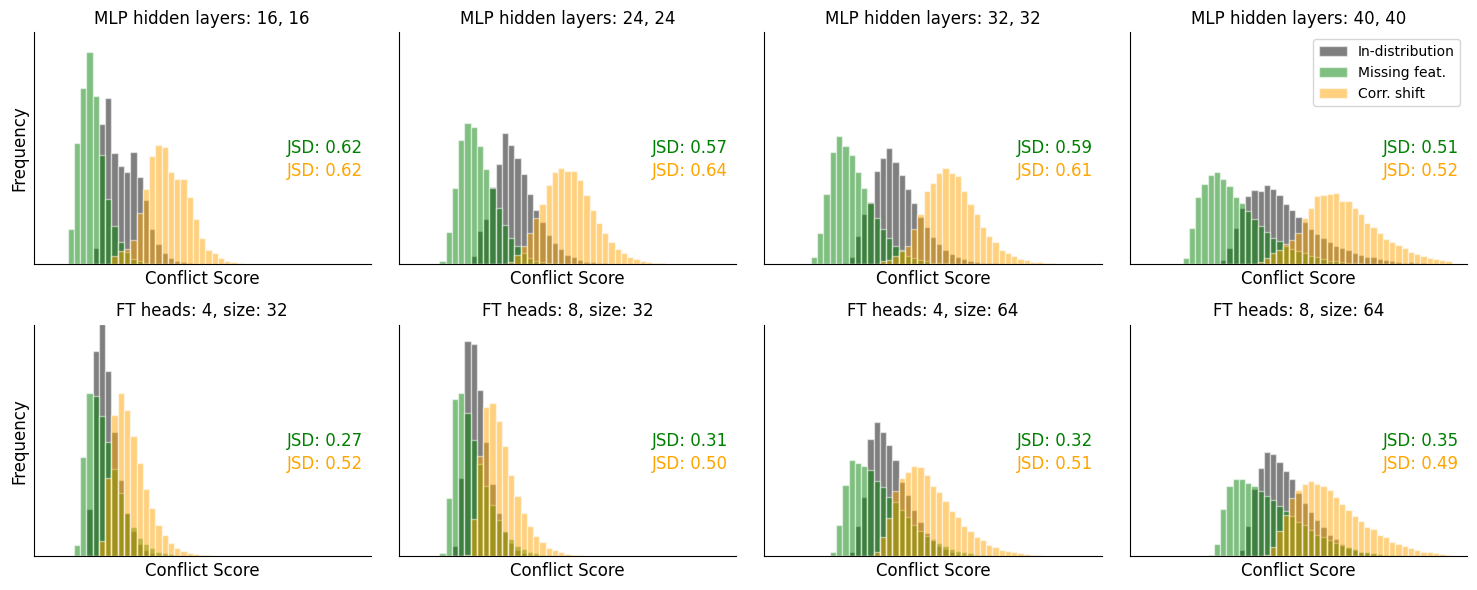

In [3]:
num_models = 4
seeds = [42,43,44,45,46]
# seeds = [40]
model_types = ['mlp','ft']

fig, ax = plt.subplots(2,num_models, figsize=(15,6))
lw = 2
fontsize = 12

mlps = [16, 24, 32, 40]
fts = [[4,32],[4,64],[8,32],[8,64]]
num_models = [[0,1,2,3], [0,2,1,3]]
for row, model_type in enumerate(model_types):
    for col, num_model in enumerate(num_models[row]):
        acs_base = []
        acs_corr = []
        acs_sem = []
        for s in seeds:
            acs = np.load(f'attr_s_conf_{model_type}_{num_model}_{s}.npy.npz')

            if model_type == 'ft':
                # acs = np.load(f'attr_s_conf_{model_type}_{num_model}_{s}.npy.npz')
                bins = [0+ 40 * i for i in range(50)]

            else:
                # acs = np.load(f'attr_s_conf_{num_model}_{s}.npy.npz')
                bins = [0+ 0.3 * i for i in range(50)]

            acs_base.append(acs['base'])
            acs_corr.append(acs['corr'])
            acs_sem.append(acs['sem'])



        hist1 = np.histogram(acs_base, bins=bins)
        hist2 = np.histogram(acs_corr, bins=bins)
        hist3 = np.histogram(acs_sem, bins=bins)

        kl_sem = jensenshannon(hist3[0], hist1[0])
        kl_corr = jensenshannon(hist2[0], hist1[0])

        # # print(kl_sem)
        # kl_sem = kl_divergence(hist3[0], hist1[0])
        # kl_corr = kl_divergence(hist2[0], hist1[0])



        ax[row][col].hist(bins[:-1], bins, weights=hist1[0], alpha=0.5, label='In-distribution', edgecolor='white', color='black')
        ax[row][col].hist(bins[:-1], bins, weights=hist3[0], alpha=0.5, label='Missing feat.', edgecolor='white', color='green')
        ax[row][col].hist(bins[:-1], bins, weights=hist2[0], alpha=0.5, label='Corr. shift', edgecolor='white', color='orange')
        if col == 3 and row == 0:
            ax[row][col].legend(fontsize=10, loc='upper right')
        if col == 0:
            ax[row][col].set_ylabel('Frequency', fontsize=fontsize)
        # if row == 1:
        ax[row][col].set_xlabel('Conflict Score', fontsize=fontsize)
        ax[row][col].set_xticklabels('')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticklabels('')
        ax[row][col].set_yticks([])
        ax[row][col].spines[['right', 'top']].set_visible(False)
        ax[row][col].set_ylim(top=12000)
        ax[row][col].text(0.75, 0.5, f"JSD: {kl_sem:.2f}", color='green', ha='left', va='center', transform=ax[row][col].transAxes, fontsize=fontsize)
        ax[row][col].text(0.75, 0.4, f"JSD: {kl_corr:.2f}", color='orange', ha='left', va='center', transform=ax[row][col].transAxes, fontsize=fontsize)


        if row == 0:
            ax[row][col].set_title(f"MLP hidden layers: {mlps[num_model]}, {mlps[num_model]}", fontsize=fontsize)
        else:
            ax[row][col].set_title(f"FT heads: {fts[num_model][0]}, size: {fts[num_model][1]}", fontsize=fontsize)
plt.tight_layout()
plt.savefig("ood.png")


In [4]:
# bins = [0 + 1.25 * i for i in range(33)]

# hist1 = np.histogram(mls_base, bins=bins)[0]
# hist2 = np.histogram(mls_corr, bins=bins)[0]
# hist3 = np.histogram(mls_sem, bins=bins)[0]

In [5]:
bins = [2 + 0.2 * i for i in range(40)]

hist1 = np.histogram(acs_base, bins=bins)[0]
hist2 = np.histogram(acs_corr, bins=bins)[0]
hist3 = np.histogram(acs_sem, bins=bins)[0]